<a href="https://colab.research.google.com/github/shadab4150/Sound-Spectrogram-classifier/blob/master/sound_to_image_pre_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import cv2
from tqdm import tqdm
import zipfile
from matplotlib.pyplot import specgram
import librosa
import warnings
warnings.filterwarnings("ignore")
import io
from pathlib import Path
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.image as mpimg
%matplotlib inline


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!unzip '/content/drive/My Drive/Dataset/environmental-sound-classification-50.zip' -d '/content/'

# Function to create a spectrogram

In [0]:
import os
import wave
import pylab
def graph_spectrogram(wav_file):
    name=str(wav_file)
    name=name.split('/')[-1].split('.')[0]
    sound_info, frame_rate = get_wav_info(wav_file)
    pylab.figure(num=None,frameon=False ,figsize=(12, 6))
    pylab.subplot(111)
    pylab.specgram(sound_info, Fs=frame_rate)
    plt.axis('off')
    loc='/content/'+str(name)+'.png'
    pylab.savefig(loc)
    pylab.close('all')
    plt.close('all')
def get_wav_info(wav_file):
    wav = wave.open(wav_file, 'r')
    frames = wav.readframes(-1)
    sound_info = pylab.fromstring(frames, 'int16')
    frame_rate = wav.getframerate()
    wav.close()
    return sound_info, frame_rate


In [0]:
import librosa.display
def graph_spectro(audio_file):
  name=str(audio_file)
  name=name.split('/')[-1].split('.')[0]
  samples, sample_rate = librosa.load(str(audio_file))
  fig = plt.figure(figsize=[0.72,0.72])
  ax = fig.add_subplot(111)
  ax.axes.get_xaxis().set_visible(False)
  ax.axes.get_yaxis().set_visible(False)
  ax.set_frame_on(False)
  filename  = '/content/audio_img/'+str(name)+'.png'
  S = librosa.feature.melspectrogram(y=samples, sr=sample_rate)
  librosa.display.specshow(librosa.power_to_db(S, ref=np.max))
  plt.savefig(filename, dpi=400, bbox_inches='tight',pad_inches=0)
  plt.close('all')

In [0]:
graph_spectrogram(str(aud/fname[456]))

In [0]:
graph_spectro(str(aud/fname[45]))

In [0]:
aud=Path('/content/audio/audio/')

In [10]:
aud/fname[45]

PosixPath('/content/audio/audio/1-15689-A-4.wav')

# A sample spectrogram of 
* clapping
* engine

673    clapping
Name: category, dtype: object


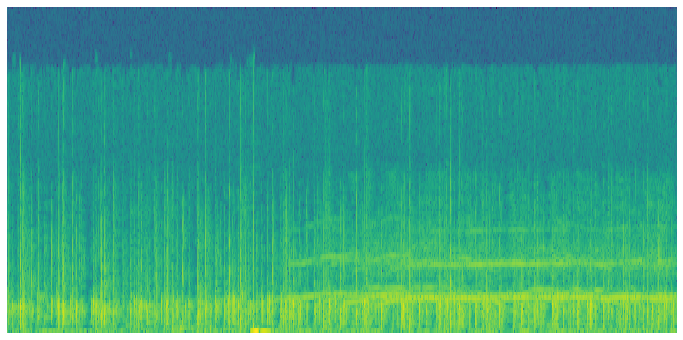

In [0]:
k=673
name=str(aud/fname[k])
sd=name.split('/')[-1].split('.')[0]
print(df[df['fname']==str(sd)].category)
graph_spectrogram(str(aud/fname[k]))

### sound sample clapping

In [0]:
import IPython
IPython.display.Audio(str(aud/fname[673]))

### Engine spectrogram

433    engine
Name: category, dtype: object


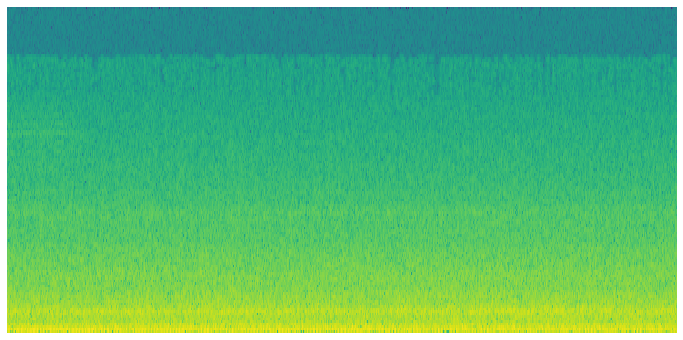

In [0]:
k=433
name=str(aud/fname[k])
sd=name.split('/')[-1].split('.')[0]
print(df[df['fname']==str(sd)].category)
graph_spectrogram(str(aud/fname[k]))

### sound sample engine

In [0]:
import IPython
IPython.display.Audio(str(aud/fname[k]))

In [0]:
df = pd.read_csv('/content/drive/My Drive/Dataset/env_sound.csv')

In [34]:
df.head()

,filename,fold,target,category,esc10,src_file,take,fname
0,1-100032-A-0.wav,1,0,dog,True,100032,A,1-100032-A-0
1,1-100038-A-14.wav,1,14,chirping_birds,False,100038,A,1-100038-A-14
2,1-100210-A-36.wav,1,36,vacuum_cleaner,False,100210,A,1-100210-A-36
3,1-100210-B-36.wav,1,36,vacuum_cleaner,False,100210,B,1-100210-B-36
4,1-101296-A-19.wav,1,19,thunderstorm,False,101296,A,1-101296-A-19


In [0]:
fname=df.filename.tolist()

In [0]:
len(fname)

2000

# saving 2000 sound samples

In [22]:
for i in tqdm(range(2000)):
  s=fname[i]
  wav=str(aud/s)
  graph_spectro(wav)


100%|██████████| 2000/2000 [20:57<00:00,  1.17it/s]


In [0]:
df.head()

,filename,fold,target,category,esc10,src_file,take,fname
0,1-100032-A-0.wav,1,0,dog,True,100032,A,1-100032-A-0
1,1-100038-A-14.wav,1,14,chirping_birds,False,100038,A,1-100038-A-14
2,1-100210-A-36.wav,1,36,vacuum_cleaner,False,100210,A,1-100210-A-36
3,1-100210-B-36.wav,1,36,vacuum_cleaner,False,100210,B,1-100210-B-36
4,1-101296-A-19.wav,1,19,thunderstorm,False,101296,A,1-101296-A-19


In [0]:
df['fname']=df['filename']

In [0]:
def name(x):
  return x.split('.')[0]

In [0]:
df.fname=df.fname.apply(name,convert_dtype=True)

In [0]:
df.to_csv('/content/drive/My Drive/Dataset/env_sound.csv',index=False)

In [0]:
df.sample(frac=0.004)

,filename,fold,target,category,esc10,src_file,take,fname
355,1-79711-A-32.wav,1,32,keyboard_typing,False,79711,A,1-79711-A-32
1840,5-218981-A-30.wav,5,30,door_wood_knock,False,218981,A,5-218981-A-30
1469,4-189332-A-37.wav,4,37,clock_alarm,False,189332,A,4-189332-A-37
1488,4-194680-A-36.wav,4,36,vacuum_cleaner,False,194680,A,4-194680-A-36
1319,4-164064-B-1.wav,4,1,rooster,True,164064,B,4-164064-B-1
414,2-102567-D-35.wav,2,35,washing_machine,False,102567,D,2-102567-D-35
1980,5-260433-A-39.wav,5,39,glass_breaking,False,260433,A,5-260433-A-39
228,1-47714-A-16.wav,1,16,wind,False,47714,A,1-47714-A-16


# zipping the sound spectrogram folder

In [27]:
import shutil
shutil.make_archive('sound_spectrogram_lebrosa', 'zip', '/content/audio_img/')


'/content/sound_spectrogram_lebrosa.zip'

In [0]:
!cp '/content/sound_spectrogram_lebrosa.zip' '/content/drive/My Drive/Dataset/'

In [0]:
from fastai.vision import *
from fastai.metrics import accuracy,error_rate

In [0]:
!unzip '/content/drive/My Drive/Dataset/sound_spectrogram.zip' -d '/content/train/'

In [0]:
path = Path('/content/audio_img/')

In [0]:
data = ImageDataBunch.from_df(path,df,fn_col='fname',label_col='category',
                              valid_pct=0.2,suffix='.png',size=224).normalize(imagenet_stats)

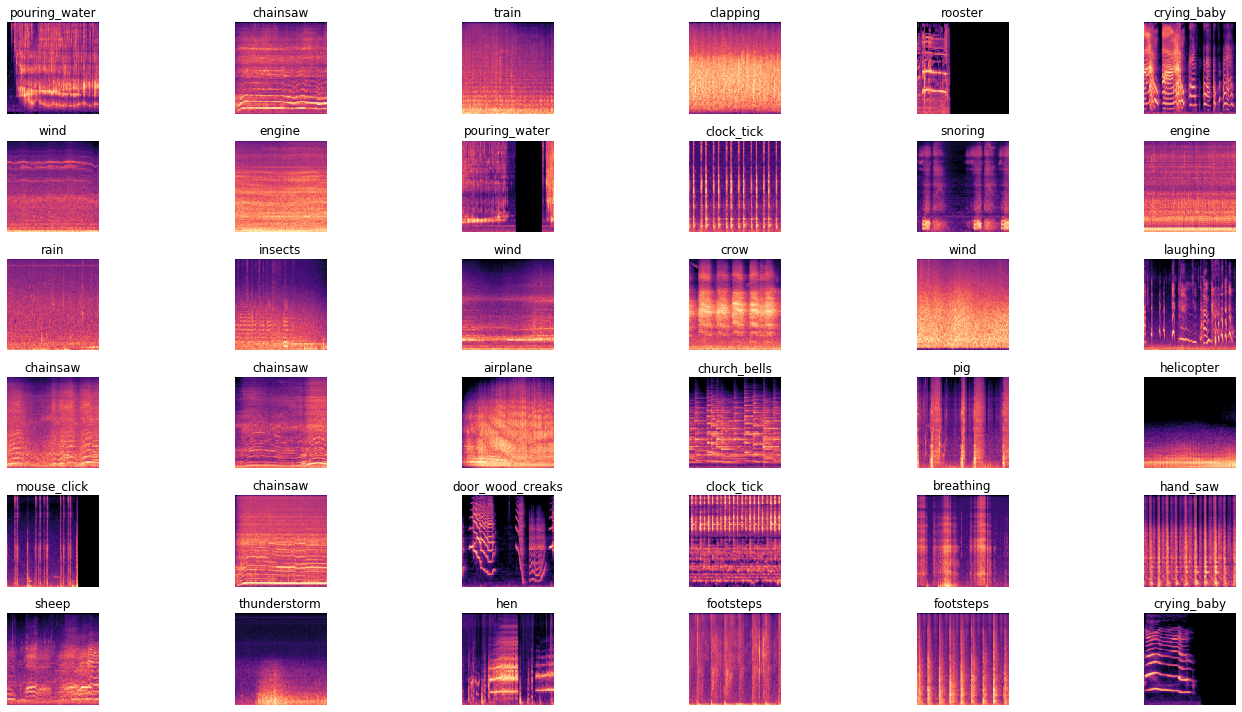

In [45]:
data.show_batch(rows=6,figsize=(20,10))

In [0]:
path1=Path('/content/train/')

In [0]:
data1 = ImageDataBunch.from_df(path1,df,fn_col='fname',label_col='category',
                              valid_pct=0.2,suffix='.png',size=224).normalize(imagenet_stats)

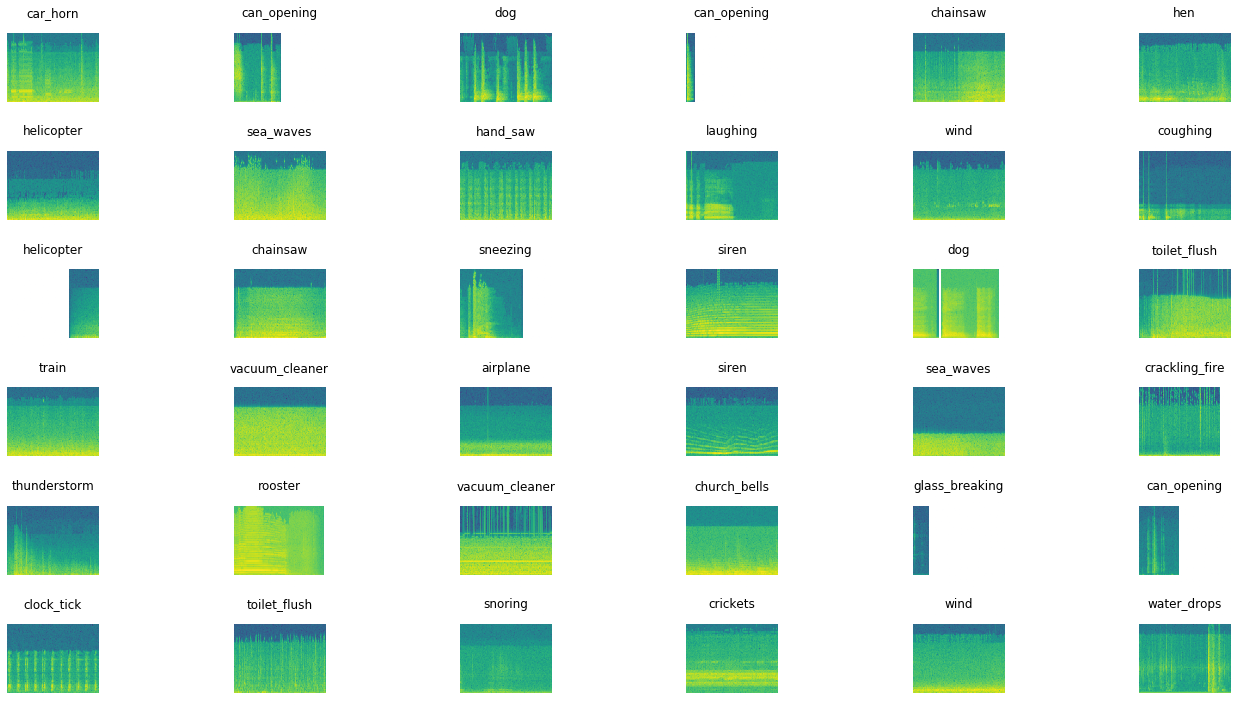

In [46]:
data1.show_batch(rows=6,figsize=(20,10))